In [1]:
from dlem import load_reader, load_model
import matplotlib.pyplot as plt
import numpy as np
from dlem.feature_extraction import extractor
from dlem.util import diagonal_normalize
import pandas as pd
import pyBigWig
from tqdm import tqdm
from typing import Optional, Sized, Iterator

In [2]:
import torch

In [3]:
import random

In [4]:
res = 10000
window_size = 2000000//res
stride = 150

In [5]:
data = load_reader("datareader_cooler")(
    "../../../loopExtraction/data/4DNFI9GMP2J8.mcool",
    res,
    window_size,
    stride,
    chrom_subset=["chr10"],
)

In [6]:
len(data)

88

In [7]:
data.filter_out_dataset(0.1)

In [8]:
len(data)

82

In [9]:
data.filter_out_dataset(0.05)

In [10]:
len(data)

76

In [11]:
data.filter_out_dataset(0.01)

In [12]:
len(data)

74

In [15]:
dataloader = torch.utils.data.DataLoader(data, batch_size=5, shuffle=True)

In [16]:
for i in tqdm(dataloader):
    pass

100%|██████████| 15/15 [00:05<00:00,  2.99it/s]


In [17]:
i

[tensor([[[4.9758e-01, 1.1453e-01, 2.9843e-02,  ..., 1.3241e-04,
           1.3241e-04, 1.3241e-04],
          [1.1453e-01, 4.7231e-01, 1.1705e-01,  ..., 1.3241e-04,
           1.3241e-04, 1.3241e-04],
          [2.9843e-02, 1.1705e-01, 4.6974e-01,  ..., 1.3241e-04,
           1.3241e-04, 1.3241e-04],
          ...,
          [1.3241e-04, 1.3241e-04, 1.3241e-04,  ..., 5.3641e-01,
           1.4665e-01, 3.2849e-02],
          [1.3241e-04, 1.3241e-04, 1.3241e-04,  ..., 1.4665e-01,
           6.0140e-01, 1.1758e-01],
          [1.3241e-04, 1.3241e-04, 1.3241e-04,  ..., 3.2849e-02,
           1.1758e-01, 5.5189e-01]],
 
         [[5.7072e-01, 1.3384e-01, 4.4026e-02,  ..., 1.1448e-04,
           2.1193e-04, 2.1193e-04],
          [1.3384e-01, 6.5366e-01, 1.6319e-01,  ..., 1.1448e-04,
           2.1193e-04, 2.1193e-04],
          [4.4026e-02, 1.6319e-01, 6.8525e-01,  ..., 1.5774e-04,
           2.2018e-04, 2.2018e-04],
          ...,
          [1.1448e-04, 1.1448e-04, 1.5774e-04,  ..., 4.977

In [6]:
sample_i = 20
sample = data[sample_i]
log_normed = diagonal_normalize(np.log(sample[0])[np.newaxis])

In [7]:
len(data) * window_size

17600

In [8]:
sample[1:]

(0.005, 'chr10', 30000000, 32000000)

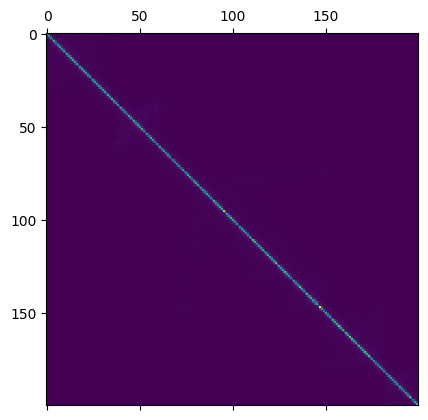

In [9]:
plt.matshow(sample[0])

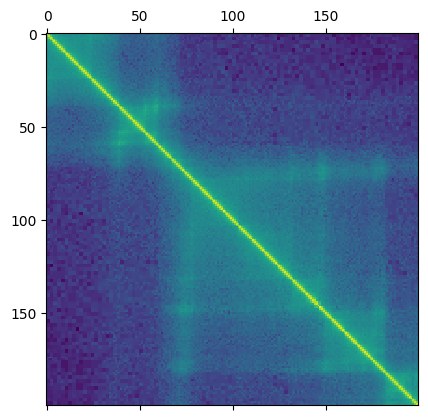

In [10]:
plt.matshow(np.log(sample[0]))

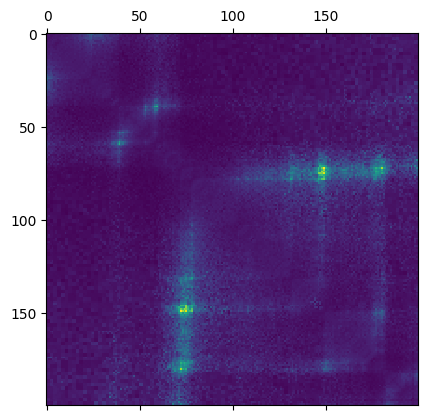

In [11]:
plt.matshow(np.exp(log_normed[0]))

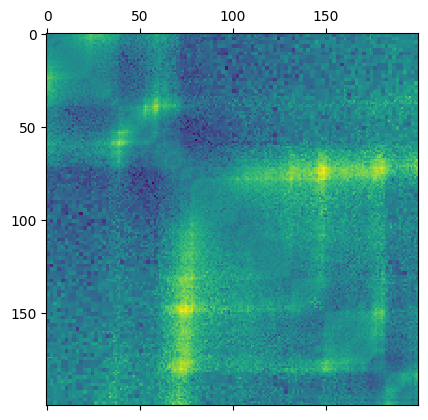

In [12]:
plt.matshow(log_normed[0])

In [13]:
import torch

In [14]:
torch.ones(10) * 0.95

tensor([0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500,
        0.9500])

In [15]:
out = extractor(log_normed[0], diag_stop=200, diag_start=1, do_print=True, num_epoch=250, arch="stalling_free_form")
patch_range = np.arange(
    sample[-2],
    sample[-1] + 1,
    (sample[-1] - sample[-2]) / sample[0].shape[0],
    dtype=int,
)
out_pd = pd.DataFrame(
    {
        "chr": sample[-3],
        "start": patch_range[:-1],
        "end": patch_range[1:],
        "left": out[0][0],
        "right": out[0][1],
    }
)

In [16]:
out[-1]

0.8136787002169766

In [17]:
out[0][1]

array([1.        , 1.        , 0.970166  , 0.96984226, 0.75984955,
       0.83888304, 0.85325515, 0.8981299 , 0.89851195, 0.9487133 ,
       1.        , 1.        , 0.85454553, 0.89336836, 0.85096496,
       0.8835067 , 0.92313665, 1.        , 0.975033  , 1.        ,
       0.87897325, 0.94715434, 0.9427265 , 1.        , 0.8563208 ,
       0.91430485, 0.7633855 , 0.88195723, 0.86005306, 0.9306072 ,
       0.89660436, 0.99252933, 0.9567105 , 0.9757963 , 0.7586735 ,
       0.8618051 , 0.78453714, 0.81101346, 0.85098004, 0.83283323,
       0.9552286 , 1.        , 0.94793725, 0.96689206, 0.9924304 ,
       1.        , 1.        , 0.9777815 , 0.98488927, 1.        ,
       0.9343393 , 0.89219844, 0.8873566 , 1.        , 0.9014822 ,
       0.8838047 , 0.82686526, 0.8394001 , 0.85116714, 0.7553338 ,
       0.660411  , 0.6989311 , 0.6986317 , 0.6753145 , 0.68880665,
       0.72519046, 0.7212955 , 0.78680956, 0.62704086, 0.735906  ,
       0.72448635, 0.7112114 , 0.66591644, 0.7968528 , 0.88115

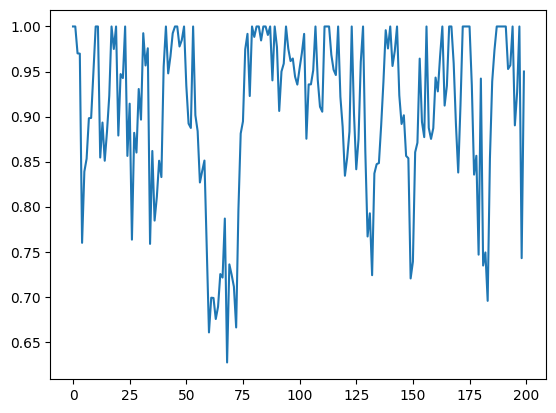

In [18]:
plt.plot(out[0][1])

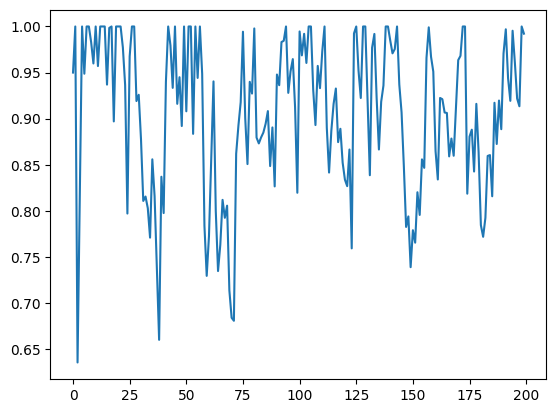

In [19]:
plt.plot(out[0][0])

Custome loss for the patch fitting. The custome loss will be used as in the shown here:
```loss_total += loss(pred, torch.log(get_diags(data, diag_i+1)))```

In [20]:
def weighted_mse(output, target):
    loss = torch.mean((output - target)**2 * torch.exp(target))
    return loss

In [21]:
diag_stop = 2000 * 750 // res
diag_start = 2000 * 5 // res

In [22]:
diag_stop, diag_start

(150, 1)

In [23]:
out_vanilla_mse = extractor(log_normed[0],
                            diag_stop=diag_stop,
                            diag_start=diag_start,
                            do_print=True,
                            num_epoch=100,
                            return_best_corr_pred=True)

In [24]:
out = extractor(log_normed[0],
                diag_stop=diag_stop,
                diag_start=diag_start,
                do_print=True,
                num_epoch=100,
                loss=weighted_mse,
                return_best_corr_pred=True)


In [25]:
from dlem.util import plot_results

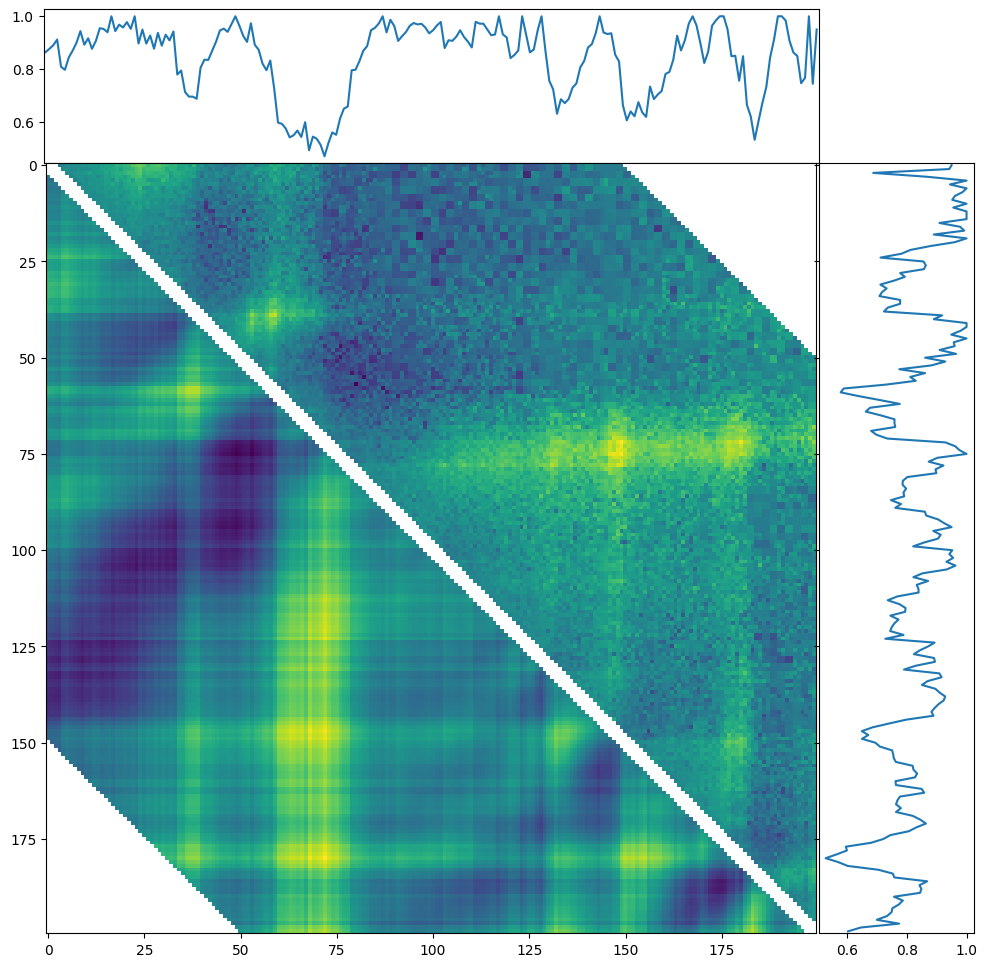

In [26]:
plot_results(log_normed[0], out_vanilla_mse[-1],
             out_vanilla_mse[0], ignore_i_off=diag_stop)

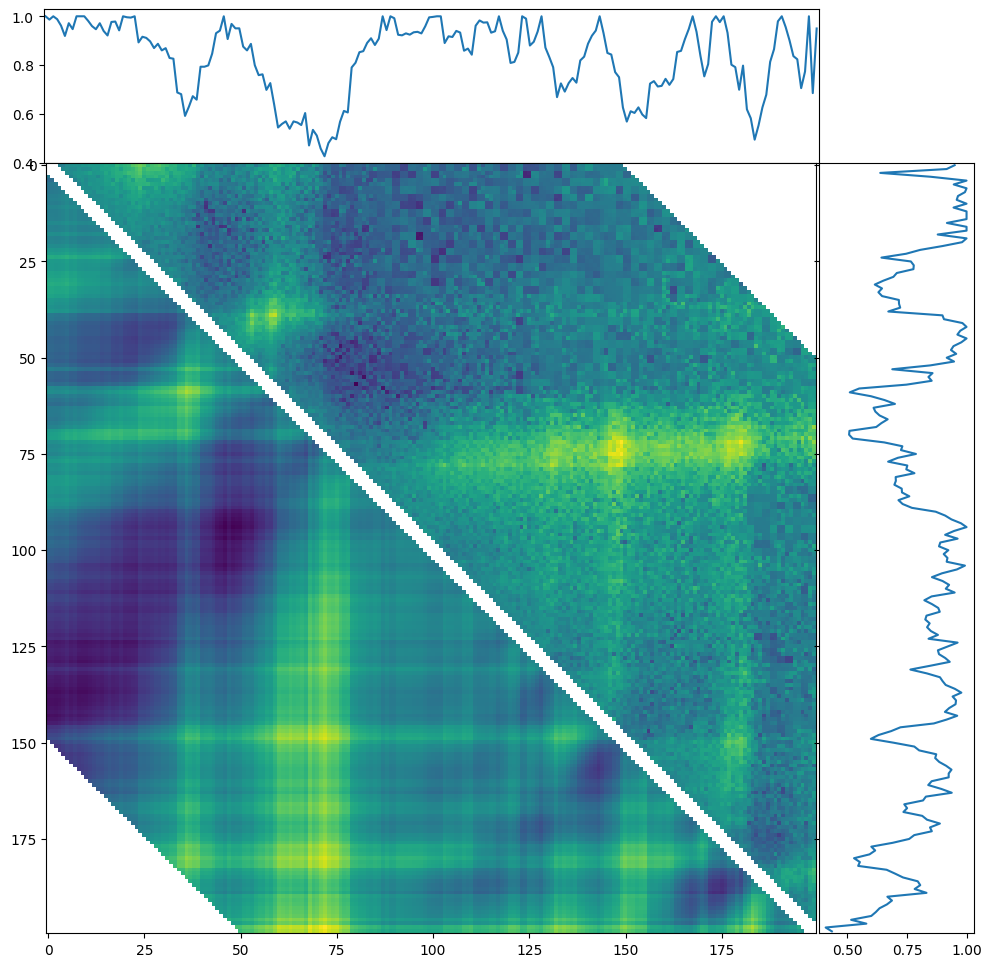

In [27]:
plot_results(log_normed[0], out[-1],
             out[0], ignore_i_off=diag_stop)

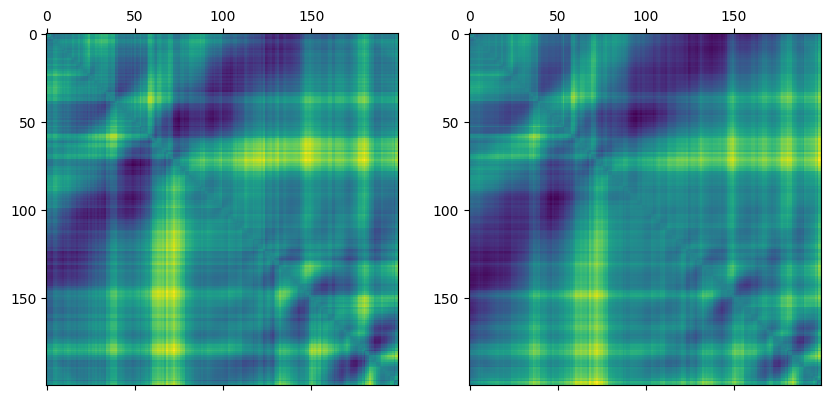

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].matshow(out_vanilla_mse[-1])
axes[1].matshow(out[-1])